<a href="https://colab.research.google.com/github/vessln/Deep_learning/blob/main/3_Neural_Networks_for_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.transform import resize

import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D, Conv2DTranspose, Dense, Flatten, GlobalMaxPool2D, GlobalAvgPool2D, Add
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.applications import vgg19, resnet50, inception_resnet_v2

# Neural Networks for Images

## Convolutional neural networks

Convolution extracts features - recognizes local patterns such as edges, shapes, etc.

Convolutional neural network is a type of neural networks specialized for image processing (classification, segmentation), video processing and other data that have a spatial structure.
I have an input image, represented as a two-dimensional matrix of numbers, where each number is the intensity of a pixel (value between 0 and 255). The filter (kernel) is a small matrix, with size 3x3 / 5x5, which slides (sliding window) over the input image. Sliding – the filter is positioned on the input image and multiplied element by element by the part it covers. The result is summed and this number is written into the output matrix - feature map. Stride s – how many pixels the filter moves with each slide (step=1 -> the filter is shifted by 1 pixel). Padding – adds a frame of pixels (can be zero, mirrored etc.) around the input image, which enlarges it to preserve its size after convolution. Valid padding – no frame. Same padding – input and output sizes remain the same.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
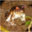

In [3]:
# this image has height=32, width=32, channels=3
x_train[0]

Two-dimensional convolutions (Conv2D) work on three-dimensional convolution volumes, because of the channels!

In tensorflow: width, height, channels.
In pytorch: channels, width, height.

Parameters:
- filters - count of filters;
- kernel_size - size of the each filter;
- padding - how much to increase / reduce the image or to be with the same dimetions

In [4]:
# tensorflow: width, height, channels
# pytorch: channels, width, height

cnn_model = Sequential([
    Input((32, 32, 3)),
    Conv2D(filters = 17, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 15, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 12, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 10, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 5, kernel_size = (3, 3), padding = "same", activation = "relu"),
])

In [5]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 17)          │             476 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 15)          │           2,310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 12)          │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 10)          │           1,090 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 5)           │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,963 (23.29 KB)

 Trainable params: 5,963 (23.29 KB)

 Non-trainable params: 0 (0.00 B)

Flatten() connects the multidimensional spatial information, resulting from the convolutional layers, with the one-dimensional inputs of the Dense layers: 32 * 32 * 5 = 5120.

In [6]:
dense_model = Sequential([
    Input((32, 32, 5)),
    Flatten(),
    Dense(20, activation= "relu"),
    Dense(10, activation= "softmax"),
])

In [7]:
dense_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 5120)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │         102,420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,630 (400.90 KB)

 Trainable params: 102,630 (400.90 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# I can combine cnn_model and dence_model:

com_model = Sequential([
    Input((32, 32, 3)),
    Conv2D(filters = 19, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 19, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 17, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 17, kernel_size = (3, 3), padding = "same", activation = "relu"),

    Conv2D(filters = 15, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 12, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 10, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 5, kernel_size = (3, 3), padding = "same", activation = "relu"),

    Flatten(),
    Dense(40, activation= "relu"),
    Dense(20, activation= "relu"),
    Dense(10, activation= "softmax"),
]).summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 19)          │             532 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 19)          │           3,268 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 17)          │           2,924 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 17)          │           2,618 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 15)          │           2,310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 12)          │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 10)          │           1,090 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 5)           │             455 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5120)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 40)                  │         204,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,699 (862.11 KB)

 Trainable params: 220,699 (862.11 KB)

 Non-trainable params: 0 (0.00 B)

I have too many parameters and I need to reduce them (Total params: 220 699). I can use **MaxPooling** dimensionality reduction (make aggregation) reduces convolutional volume four times.

**GlobalMaxPool2D** reduces the number of channels. It is used when convolutional volume is bigger (alternative to Flatten). **GlobalAvgPool2D** is more commonly used.

In [9]:
comb_model = Sequential([
    Input((32, 32, 3)),
    Conv2D(filters = 19, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 19, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 17, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 17, kernel_size = (3, 3), padding = "same", activation = "relu"),
    MaxPool2D(),

    Conv2D(filters = 15, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 12, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 10, kernel_size = (3, 3), padding = "same", activation = "relu"),
    Conv2D(filters = 5, kernel_size = (3, 3), padding = "same", activation = "relu"),
    MaxPool2D(),

    # Flatten(),
    GlobalAvgPool2D(),
    Dense(40, activation= "relu"),
    Dense(20, activation= "relu"),
    Dense(10, activation= "softmax"),
])

In [10]:
comb_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 19)          │             532 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 19)          │           3,268 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 17)          │           2,924 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 17)          │           2,618 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 17)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 15)          │           2,310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 12)          │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 10)          │           1,090 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 5)           │             455 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 5)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 5)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 40)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,099 (62.89 KB)

 Trainable params: 16,099 (62.89 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
comb_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam")

In [12]:
comb_model.fit(x_train[:5000], y_train[:5000], epochs = 5)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 161ms/step - loss: 2.3224
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 150ms/step - loss: 2.1718
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 151ms/step - loss: 1.9560
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - loss: 1.8696
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 149ms/step - loss: 1.8079


## vgg19

In [13]:
vgg_model = vgg19.VGG19()

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [14]:
vgg_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
vgg_model.layers[12].weights

[<KerasVariable shape=(3, 3, 256, 512), dtype=float32, path=block4_conv1/kernel>,
 <KerasVariable shape=(512,), dtype=float32, path=block4_conv1/bias>]

In [16]:
# preprocess_input function doesnt resize
preprocessed = vgg19.preprocess_input(x_train[:10])

In [17]:
preprocessed.shape

(10, 32, 32, 3)

The model vgg19 expects shape: (224, 224, 3), but my image is: (32, 32, 3).

In [18]:
from tensorflow.keras.layers import Rescaling

In [19]:
resized_img = resize(x_train[0], (224, 224), preserve_range=True).astype(np.uint8)

In [20]:
resized_img.shape

(224, 224, 3)

array([[[ 33,  36,  36],
        [ 36,  38,  39],
        [ 38,  41,  41],
        ...,
        [137, 107,  82],
        [137, 107,  82],
        [137, 107,  81]],

       [[ 39,  42,  42],
        [ 42,  45,  45],
        [ 44,  47,  48],
        ...,
        [140, 113,  89],
        [141, 113,  89],
        [141, 113,  88]],

       [[ 46,  48,  49],
        [ 48,  51,  51],
        [ 50,  53,  54],
        ...,
        [144, 118,  96],
        [145, 118,  95],
        [145, 118,  95]],

       ...,

       [[173, 136, 101],
        [174, 138, 105],
        [176, 141, 109],
        ...,
        [121,  89,  68],
        [124,  93,  69],
        [128,  96,  70]],

       [[174, 136,  96],
        [175, 138, 101],
        [176, 140, 105],
        ...,
        [115,  83,  62],
        [118,  86,  63],
        [121,  89,  64]],

       [[174, 135,  92],
        [175, 137,  97],
        [177, 139, 102],
        ...,
        [109,  77,  56],
        [112,  80,  57],
        [115,  83,  58]]], dtype=uint8)
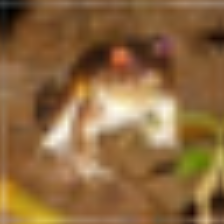

In [21]:
resized_img

In [22]:
images = np.array([resize(x_train[i], (224, 224), preserve_range=True).astype(np.uint8) for i in range(50)])

In [23]:
images.shape

(50, 224, 224, 3)

In [24]:
preprocessed_images = vgg19.preprocess_input(images)

In [25]:
predictions_probabilities = vgg_model.predict(preprocessed_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 34s 13s/step


In [26]:
predictions_probabilities

array([[6.8698684e-04, 1.5271391e-02, 1.0795880e-05, ..., 4.5592600e-04,
        5.3814106e-04, 6.9145835e-06],
       [8.9981211e-07, 8.0726272e-07, 2.9883868e-08, ..., 3.0135602e-08,
        1.5150373e-06, 1.9761706e-07],
       [1.0972826e-04, 3.1540945e-05, 6.4884462e-06, ..., 6.3131665e-06,
        1.7730249e-04, 6.3365096e-06],
       ...,
       [1.6427335e-05, 8.4834255e-06, 4.4948418e-05, ..., 8.9718901e-07,
        2.2703007e-06, 1.3351939e-07],
       [1.0207788e-04, 3.4475374e-06, 1.1897511e-06, ..., 5.0614108e-07,
        6.7692454e-06, 1.1243643e-06],
       [6.4456835e-06, 3.0237233e-04, 2.1267369e-06, ..., 8.3076299e-07,
        2.1651318e-05, 2.2697895e-07]], dtype=float32)

In [27]:
vgg19.decode_predictions(predictions_probabilities)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03347037', 'fire_screen', 0.12202412),
  ('n04443257', 'tobacco_shop', 0.035200235),
  ('n03871628', 'packet', 0.02293932),
  ('n07590611', 'hot_pot', 0.020755785),
  ('n01773549', 'barn_spider', 0.02065492)],
 [('n03796401', 'moving_van', 0.89656836),
  ('n04467665', 'trailer_truck', 0.04767666),
  ('n03776460', 'mobile_home', 0.031516373),
  ('n03417042', 'garbage_truck', 0.0033560575),
  ('n03895866', 'passenger_car', 0.002592392)],
 [('n04428191', 'thresher', 0.23830506),
  ('n03134739', 'croquet_ball', 0.05163732),
  ('n03000684', 'chain_saw', 0.044336446),
  ('n02950826', 'cannon', 0.03177263),
  ('n03498962', 'hatchet', 0.027883796)],
 [('n01795545', 'black_grouse', 0.25616363),
  ('n02422106', 'hartebeest', 0.14226277),
  ('n02002724', 'black_stork', 0.08712437),
  ('n01871265', 'tusker', 0.04051196),
  ('n02114855', 'coyote', 0.034868747)],
 [('n03796401', 'moving_van', 0.72487336),
  ('n04467665', 'trailer_truck', 0.099333934),
  ('n02690373', 'airliner', 0.04269375),
  

array([[[ 28,  25,  10],
        [ 37,  34,  19],
        [ 38,  35,  20],
        ...,
        [ 76,  67,  39],
        [ 81,  72,  43],
        [ 85,  76,  47]],

       [[ 33,  28,  13],
        [ 34,  30,  14],
        [ 32,  27,  12],
        ...,
        [ 95,  82,  55],
        [ 96,  82,  56],
        [ 85,  72,  45]],

       [[ 39,  32,  15],
        [ 40,  33,  17],
        [ 57,  50,  33],
        ...,
        [ 93,  76,  52],
        [107,  89,  66],
        [ 95,  77,  54]],

       ...,

       [[ 83,  73,  52],
        [ 87,  77,  56],
        [ 84,  74,  52],
        ...,
        [ 99,  93,  70],
        [ 90,  84,  61],
        [ 81,  75,  52]],

       [[ 88,  72,  51],
        [ 90,  74,  52],
        [ 93,  77,  56],
        ...,
        [ 80,  74,  53],
        [ 76,  70,  49],
        [ 82,  76,  55]],

       [[ 97,  78,  56],
        [ 94,  75,  53],
        [ 93,  75,  53],
        ...,
        [ 54,  47,  28],
        [ 63,  56,  37],
        [ 72,  65,  46]]], dtype=uint8)
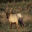

In [28]:
x_train[3]

In [29]:
tf.keras.backend.clear_session()

## ResNet50

In [30]:
resnet = resnet50.ResNet50()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [31]:
resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [32]:
inputs = Input((224, 224, 3))
conv1 = Conv2D(20, (3, 3), activation = "relu", padding = "same")(inputs)
conv2 = Conv2D(20, (3, 3), activation = "relu", padding = "same")(conv1)
conv3 = Conv2D(20, (3, 3), activation = "relu", padding = "same")(conv2)
conv4 = Conv2D(20, (3, 3), activation = "relu", padding = "same")(conv3)

add_result = Add()([conv1, conv4])

residual_block = Model(inputs = inputs, outputs = add_result)

In [33]:
residual_block.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 224, 224, 20)   │            560 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 224, 224, 20)   │          3,620 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 224, 224, 20)   │          3,620 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 224, 224, 20)   │          3,620 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 224, 224, 20)   │              0 │ conv2d[0][0],          │
│                           │                        │                │ conv2d_3[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 11,420 (44.61 KB)

 Trainable params: 11,420 (44.61 KB)

 Non-trainable params: 0 (0.00 B)

## Inception-ResNet

In [35]:
inception_resnet_v2.InceptionResNetV2().summary()

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_207 (Conv2D)       │ (None, 149, 149, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_203   │ (None, 149, 149, 32)   │             96 │ conv2d_207[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_203            │ (None, 149, 149, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_208 (Conv2D)       │ (None, 147, 147, 32)   │          9,216 │ activation_203[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_204   │ (None, 147, 147, 32)   │             96 │ conv2d_208[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_204            │ (None, 147, 147, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_209 (Conv2D)       │ (None, 147, 147, 64)   │         18,432 │ activation_204[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_205   │ (None, 147, 147, 64)   │            192 │ conv2d_209[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_205            │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 73, 73, 64)     │              0 │ activation_205[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_210 (Conv2D)       │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_206   │ (None, 73, 73, 80)     │            240 │ conv2d_210[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_206            │ (None, 73, 73, 80)     │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_211 (Conv2D)  

 Total params: 55,873,736 (213.14 MB)

 Trainable params: 55,813,192 (212.91 MB)

 Non-trainable params: 60,544 (236.50 KB)

## Encoder-Decoder architecture

Encoder that processes the input data and converts it into a context vector (a compact number). This vector summarizes all the important information from the input. Decoder uses the context vector to generate the output data step by step.

In [40]:
encoder = Sequential([
    Input((224, 224, 3)),
    Conv2D(256, (3, 3), activation = "relu", padding = "same"),
    Conv2D(128, (3, 3), activation = "relu", padding = "same"),
    MaxPool2D(),

    Conv2D(128, (3, 3), activation = "relu", padding = "same"),
    Conv2D(64, (3, 3), activation = "relu", padding = "same"),
    MaxPool2D(),

    Conv2D(64, (3, 3), activation = "relu", padding = "same"),
    Conv2D(32, (3, 3), activation = "relu", padding = "same"),
    MaxPool2D(),
])

In [41]:
encoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_416 (Conv2D)                  │ (None, 224, 224, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_417 (Conv2D)                  │ (None, 224, 224, 128)       │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 112, 112, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_418 (Conv2D)                  │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_419 (Conv2D)                  │ (None, 112, 112, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_420 (Conv2D)                  │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_421 (Conv2D)                  │ (None, 56, 56, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 28, 28, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 578,976 (2.21 MB)

 Trainable params: 578,976 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

UpSampling2D is the inverse function of Maxpooling!

In [45]:
decoder = Sequential([
    Input((28, 28, 32)),
    UpSampling2D(),
    Conv2D(32, (3, 3), activation = "relu", padding = "same"),
    Conv2D(64, (3, 3), activation = "relu", padding = "same"),

    UpSampling2D(),
    Conv2D(64, (3, 3), activation = "relu", padding = "same"),
    Conv2D(128, (3, 3), activation = "relu", padding = "same"),

    UpSampling2D(),
    Conv2D(128, (3, 3), activation = "relu", padding = "same"),
    Conv2D(256, (3, 3), activation = "relu", padding = "same"),

    Conv2D(3, (3, 3), padding = "same"),
])

In [46]:
decoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ up_sampling2d_3 (UpSampling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_429 (Conv2D)                  │ (None, 56, 56, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_430 (Conv2D)                  │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_431 (Conv2D)                  │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_432 (Conv2D)                  │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 224, 224, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_433 (Conv2D)                  │ (None, 224, 224, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_434 (Conv2D)                  │ (None, 224, 224, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_435 (Conv2D)                  │ (None, 224, 224, 3)         │           6,915 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 588,195 (2.24 MB)

 Trainable params: 588,195 (2.24 MB)

 Non-trainable params: 0 (0.00 B)

In the decoder must be used UpSampling2D and Conv2DTranspose.
Conv2DTranspose is inverse convolution.

From a larger convolutional volume to a smaller one, forward convolutions (Conv2D) are used! From a smaller one to a larger one, inverse convolutions (Conv2DTranspose) are used!

In [47]:
encoder_decoder = Sequential([
    # encoder:
    Input((224, 224, 3)),
    Conv2D(256, (3, 3), activation = "relu", padding = "same"),
    Conv2D(128, (3, 3), activation = "relu", padding = "same"),
    MaxPool2D(),
    Conv2D(128, (3, 3), activation = "relu", padding = "same"),
    Conv2D(64, (3, 3), activation = "relu", padding = "same"),
    MaxPool2D(),
    Conv2D(64, (3, 3), activation = "relu", padding = "same"),
    Conv2D(32, (3, 3), activation = "relu", padding = "same"),
    MaxPool2D(),

    # decoder:
    UpSampling2D(),
    Conv2DTranspose(32, (3, 3), activation = "relu", padding = "same"),
    Conv2DTranspose(64, (3, 3), activation = "relu", padding = "same"),
    UpSampling2D(),
    Conv2DTranspose(64, (3, 3), activation = "relu", padding = "same"),
    Conv2DTranspose(128, (3, 3), activation = "relu", padding = "same"),
    UpSampling2D(),
    Conv2DTranspose(128, (3, 3), activation = "relu", padding = "same"),
    Conv2DTranspose(256, (3, 3), activation = "relu", padding = "same"),

    # segmentation with 50 classes:
    Conv2DTranspose(50, (3, 3), activation = "softmax", padding = "same"),
])